In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('/content/Liver_disease_data.csv')
df.shape

(1700, 11)

In [3]:
df.head()

,Age,Gender,BMI,AlcoholConsumption,Smoking,GeneticRisk,PhysicalActivity,Diabetes,Hypertension,LiverFunctionTest,Diagnosis
0,58,0,35.857584,17.272828,0,1,0.658940,0,0,42.734240,1
1,71,1,30.732470,2.201266,0,1,1.670557,1,0,67.309822,1
2,48,0,19.971407,18.500944,0,0,9.928308,0,0,63.738956,0
3,34,1,16.615417,12.632870,0,0,5.630129,0,0,64.555873,1
4,62,1,16.065830,1.087815,0,1,3.566218,1,0,77.868689,1


In [4]:
df.shape

(1700, 11)

In [5]:
df.isnull().sum()

,0
Age,0
Gender,0
BMI,0
AlcoholConsumption,0
Smoking,0
GeneticRisk,0
PhysicalActivity,0
Diabetes,0
Hypertension,0
LiverFunctionTest,0


In [6]:
numeric_columns = df.select_dtypes(include=['number']).columns
non_numeric_columns = df.select_dtypes(exclude=['number']).columns

In [7]:
numeric_columns

Index(['Age', 'Gender', 'BMI', 'AlcoholConsumption', 'Smoking', 'GeneticRisk',
       'PhysicalActivity', 'Diabetes', 'Hypertension', 'LiverFunctionTest',
       'Diagnosis'],
      dtype='object')

In [8]:
non_numeric_columns

Index([], dtype='object')

In [9]:
df = df.dropna(how='any')

In [10]:
df.isnull().sum()

,0
Age,0
Gender,0
BMI,0
AlcoholConsumption,0
Smoking,0
GeneticRisk,0
PhysicalActivity,0
Diabetes,0
Hypertension,0
LiverFunctionTest,0


In [11]:
for col in non_numeric_columns:
    df[col] = df[col].fillna(df[col].mode()[0])

In [12]:
df.head()

,Age,Gender,BMI,AlcoholConsumption,Smoking,GeneticRisk,PhysicalActivity,Diabetes,Hypertension,LiverFunctionTest,Diagnosis
0,58,0,35.857584,17.272828,0,1,0.658940,0,0,42.734240,1
1,71,1,30.732470,2.201266,0,1,1.670557,1,0,67.309822,1
2,48,0,19.971407,18.500944,0,0,9.928308,0,0,63.738956,0
3,34,1,16.615417,12.632870,0,0,5.630129,0,0,64.555873,1
4,62,1,16.065830,1.087815,0,1,3.566218,1,0,77.868689,1


In [14]:
"""from sklearn import preprocessing

label_encoder = preprocessing.LabelEncoder()
columns_to_encode = [
'gender', 'smoking_history']


for column in columns_to_encode:
    df[column] = label_encoder.fit_transform(df[column])"""


"from sklearn import preprocessing\n\nlabel_encoder = preprocessing.LabelEncoder()\ncolumns_to_encode = [\n'gender', 'smoking_history']\n\n\nfor column in columns_to_encode:\n    df[column] = label_encoder.fit_transform(df[column])"

In [15]:
df.head()

,Age,Gender,BMI,AlcoholConsumption,Smoking,GeneticRisk,PhysicalActivity,Diabetes,Hypertension,LiverFunctionTest,Diagnosis
0,58,0,35.857584,17.272828,0,1,0.658940,0,0,42.734240,1
1,71,1,30.732470,2.201266,0,1,1.670557,1,0,67.309822,1
2,48,0,19.971407,18.500944,0,0,9.928308,0,0,63.738956,0
3,34,1,16.615417,12.632870,0,0,5.630129,0,0,64.555873,1
4,62,1,16.065830,1.087815,0,1,3.566218,1,0,77.868689,1


In [16]:
df.head()

,Age,Gender,BMI,AlcoholConsumption,Smoking,GeneticRisk,PhysicalActivity,Diabetes,Hypertension,LiverFunctionTest,Diagnosis
0,58,0,35.857584,17.272828,0,1,0.658940,0,0,42.734240,1
1,71,1,30.732470,2.201266,0,1,1.670557,1,0,67.309822,1
2,48,0,19.971407,18.500944,0,0,9.928308,0,0,63.738956,0
3,34,1,16.615417,12.632870,0,0,5.630129,0,0,64.555873,1
4,62,1,16.065830,1.087815,0,1,3.566218,1,0,77.868689,1


In [18]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
x = df.drop(columns=['Diagnosis'])
y = df['Diagnosis']

In [19]:
print(x)

      Age  Gender        BMI  AlcoholConsumption  Smoking  GeneticRisk  \
0      58       0  35.857584           17.272828        0            1   
1      71       1  30.732470            2.201266        0            1   
2      48       0  19.971407           18.500944        0            0   
3      34       1  16.615417           12.632870        0            0   
4      62       1  16.065830            1.087815        0            1   
...   ...     ...        ...                 ...      ...          ...   
1695   42       0  38.498295           14.384688        0            1   
1696   40       0  27.600094            5.431009        0            0   
1697   38       0  38.730017            6.324302        1            2   
1698   67       0  35.820798           16.899417        0            2   
1699   80       0  24.060783            9.526447        0            0   

      PhysicalActivity  Diabetes  Hypertension  LiverFunctionTest  
0             0.658940         0           

In [20]:
print(x.shape)

(1700, 10)


In [21]:
print(y)

0       1
1       1
2       0
3       1
4       1
       ..
1695    1
1696    1
1697    1
1698    1
1699    1
Name: Diagnosis, Length: 1700, dtype: int64


In [25]:
xtrain, xtest, ytrain, ytest = train_test_split(x,y,test_size=0.25,random_state=2)
model = RandomForestClassifier()
model.fit(xtrain,ytrain)

RandomForestClassifier()

In [26]:
# accuracy on training data
xtrain_prediction = model.predict(xtrain)
training_data_accuracy = accuracy_score(ytrain, xtrain_prediction)

print('Accuracy on training data = ', training_data_accuracy)

Accuracy on training data =  1.0


In [27]:
# accuracy on test data
xtest_prediction = model.predict(xtest)
test_data_accuracy = accuracy_score( xtest_prediction, ytest)

print('Accuracy on test data = ', test_data_accuracy)

Accuracy on test data =  0.9011764705882352


In [28]:
# Evaluate the model
conf_matrix = confusion_matrix(ytest, xtest_prediction)
class_report = classification_report(ytest, xtest_prediction)

In [29]:
print("\nClassification Report:\n", class_report)


Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.91      0.89       193
           1       0.92      0.90      0.91       232

    accuracy                           0.90       425
   macro avg       0.90      0.90      0.90       425
weighted avg       0.90      0.90      0.90       425



In [30]:
print("\nClassification Report:\n", conf_matrix)


Classification Report:
 [[175  18]
 [ 24 208]]


In [31]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score

model = GradientBoostingClassifier(
    n_estimators=100,        # কম tree
    learning_rate=0.05,     # slow learning
    max_depth=2,            # shallow tree
    min_samples_split=10,
    min_samples_leaf=5,
    subsample=0.7,
    random_state=42
)

model.fit(xtrain, ytrain)
y_pred = model.predict(xtest)

print("Gradient Boosting Accuracy:", accuracy_score(ytest, y_pred))


Gradient Boosting Accuracy: 0.9223529411764706


In [32]:
xtest_prediction = model.predict(xtest)
test_data_accuracy = accuracy_score( xtest_prediction, ytest)

print('Accuracy on test data = ', test_data_accuracy)

Accuracy on test data =  0.9223529411764706


In [35]:
print("Expected features for the model:", x.columns.tolist())

# The current input_data has 8 features, but the model expects 10.
# You need to adjust this tuple to have 10 values, corresponding to the expected features.
# Expected features: ['Age', 'Gender', 'BMI', 'AlcoholConsumption', 'Smoking', 'GeneticRisk', 'PhysicalActivity', 'Diabetes', 'Hypertension', 'LiverFunctionTest']
input_data = (58, 0, 35.85, 17.27, 0, 1, 0.65, 0, 0, 42.73) # Example values for 10 features. Please replace with actual patient data.

# change the input data to a numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the numpy array as we are predicting for one datapoint
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = model.predict(input_data_reshaped)
print(prediction)

if (prediction[0] == 1):
  print('The person is predicted to have Liver Disease')

else:
  print('The person is predicted not to have Liver Disease')


Expected features for the model: ['Age', 'Gender', 'BMI', 'AlcoholConsumption', 'Smoking', 'GeneticRisk', 'PhysicalActivity', 'Diabetes', 'Hypertension', 'LiverFunctionTest']
[1]
The person is predicted to have Liver Disease


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but GradientBoostingClassifier was fitted with feature names
  warnings.warn(


In [36]:
import pickle


filename = 'liver_disease.sav'
pickle.dump(model, open(filename, 'wb'))


# loading the saved model
loaded_model = pickle.load(open(filename, 'rb'))

for column in df.columns:
    print(column)

Age
Gender
BMI
AlcoholConsumption
Smoking
GeneticRisk
PhysicalActivity
Diabetes
Hypertension
LiverFunctionTest
Diagnosis


In [37]:
# Import ML Models
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [38]:
from sklearn import svm

In [39]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
xtrain_scaled = scaler.fit_transform(xtrain)
xtest_scaled = scaler.transform(xtest)


In [58]:
#knn
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
knn=KNeighborsClassifier(n_neighbors=7)
knn.fit(xtrain_scaled,ytrain)
y_pred=knn.predict(xtest_scaled)
accuracy=accuracy_score(ytest,y_pred)
print(accuracy)

0.8141176470588235


In [41]:
"""from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_neighbors': [3,5,7,9,11,13,15],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan', 'minkowski']
}

knn = KNeighborsClassifier()
grid = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy')
grid.fit(xtrain_scaled, ytrain)

print("Best params:", grid.best_params_)
print("Best CV accuracy:", grid.best_score_)"""


'from sklearn.neighbors import KNeighborsClassifier\nfrom sklearn.model_selection import GridSearchCV\n\nparam_grid = {\n    \'n_neighbors\': [3,5,7,9,11,13,15],\n    \'weights\': [\'uniform\', \'distance\'],\n    \'metric\': [\'euclidean\', \'manhattan\', \'minkowski\']\n}\n\nknn = KNeighborsClassifier()\ngrid = GridSearchCV(knn, param_grid, cv=5, scoring=\'accuracy\')\ngrid.fit(xtrain_scaled, ytrain)\n\nprint("Best params:", grid.best_params_)\nprint("Best CV accuracy:", grid.best_score_)'

In [42]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

dt = DecisionTreeClassifier(
    max_depth=5,          # tree ছোট
    min_samples_split=10, # split করার জন্য min sample
    min_samples_leaf=5,   # leaf-এ min sample
    criterion='gini'
)

dt.fit(xtrain, ytrain)
dt_pred = dt.predict(xtest)

print("Decision Tree Accuracy:", accuracy_score(ytest, dt_pred))


Decision Tree Accuracy: 0.8376470588235294


In [43]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

xgb = XGBClassifier(
    n_estimators=50,        # কম tree
    max_depth=3,            # shallow tree
    learning_rate=0.05,     # slow learning
    subsample=0.7,          # data sampling
    colsample_bytree=0.7,   # feature sampling
    reg_alpha=1,            # L1 regularization
    reg_lambda=2,           # L2 regularization
    gamma=1,                # split restriction
    use_label_encoder=False,
    eval_metric='mlogloss'
)

xgb.fit(xtrain, ytrain)
xgb_pred = xgb.predict(xtest)

print("XGBoost Accuracy:", accuracy_score(ytest, xgb_pred))


XGBoost Accuracy: 0.8894117647058823


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [08:29:50] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


In [44]:
# Classification Report
print("\nXGBClassifier Classification Report:\n", classification_report(ytest,xgb_pred ))


XGBClassifier Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.89      0.88       193
           1       0.90      0.89      0.90       232

    accuracy                           0.89       425
   macro avg       0.89      0.89      0.89       425
weighted avg       0.89      0.89      0.89       425



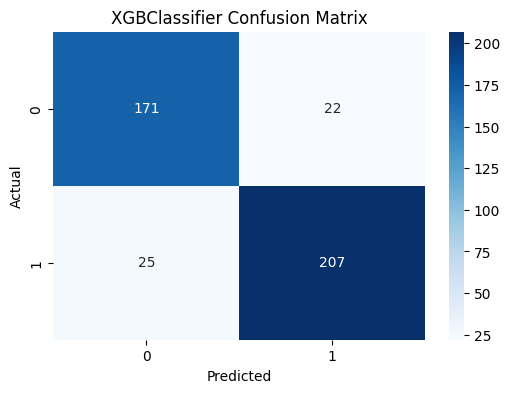

In [45]:
# Generate Confusion Matrix
cm = confusion_matrix(ytest, xgb_pred)

# Plot Confusion Matrix
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(ytest), yticklabels=np.unique(ytest))
plt.title("XGBClassifier Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [60]:
logs = LogisticRegression(
    C=3,
    solver='liblinear',
    class_weight='balanced',
    max_iter=3000
)
logs.fit(xtrain, ytrain)
logs_pred = logs.predict(xtest)

print("Logistic Regression Accuracy:", accuracy_score(ytest, logs_pred))

Logistic Regression Accuracy: 0.8070588235294117


In [61]:
#svm
from sklearn import svm
from sklearn.metrics import accuracy_score
model=svm.SVC(kernel='linear')
model.fit(xtrain,ytrain)
y_pre=model.predict(xtest)
accuracy=accuracy_score(ytest,y_pre)
accuracy

0.8117647058823529

In [64]:
from sklearn.naive_bayes import GaussianNB #Naive bayes

model = GaussianNB(var_smoothing=1e-8)
model.fit(xtrain, ytrain)
y_pred = model.predict(xtest)
test_data_accuracy = accuracy_score( y_pred, ytest)
print('Accuracy on test data = ', test_data_accuracy)

Accuracy on test data =  0.788235294117647


In [49]:
#random forest
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(xtrain, ytrain)
y_pred = model.predict(xtest)

print("Random Forest Accuracy:", accuracy_score(ytest, y_pred))

Random Forest Accuracy: 0.8964705882352941


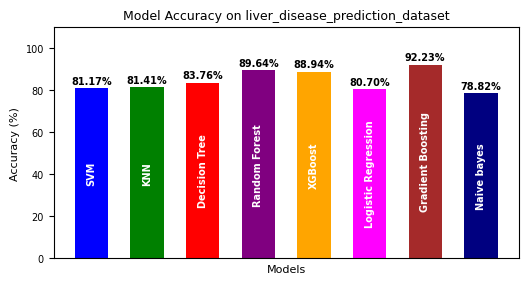

In [65]:
import matplotlib.pyplot as plt

# Data
models = ["SVM", "KNN", "Decision Tree", "Random Forest", "XGBoost", "Logistic Regression", "Gradient Boosting","Naive bayes"]
accuracy = [81.17, 81.41, 83.76, 89.64, 88.94, 80.70, 92.23,78.82]

# Plot
plt.figure(figsize=(6, 3))  # Small figure size
bars = plt.bar(models, accuracy, color=['blue', 'green', 'red', 'purple', 'orange', 'magenta', 'brown','navy'], width=0.6)

# Add model names inside the bars (centered)
for bar, model in zip(bars, models):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height()/2, model, ha='center', va='center',
             fontsize=7, fontweight='bold', color='white', rotation=90)  # Rotated for better fit

# Add accuracy values above the bars
for bar in bars:
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 2, f"{bar.get_height():.2f}%",
             ha='center', fontsize=7, fontweight='bold', color='black')

# Labels and title
plt.xlabel("Models", fontsize=8)
plt.ylabel("Accuracy (%)", fontsize=8)
plt.title("Model Accuracy on liver_disease_prediction_dataset", fontsize=9)
plt.xticks([])  # Remove x-axis labels since names are inside bars
plt.yticks(fontsize=7)
plt.ylim(0, 110)  # Set y-axis limit above 100

# Show plot
plt.show()